In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/kaggle-llm-science-exam/sample_submission.csv
/kaggle/input/kaggle-llm-science-exam/train.csv
/kaggle/input/kaggle-llm-science-exam/test.csv


# ADVANCED:

## Day 1 - Predictive Insights from EDA
 ### Identify potential predictive variables.


# Loading the dataset

In [3]:
# Load the dataset
train_data = pd.read_csv('/kaggle/input/kaggle-llm-science-exam/train.csv')
train_data

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D
...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C
196,196,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B
197,197,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B
198,198,"What is the relationship between mass, force, ...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D


# Basic Info of the dataset

In [4]:
# Display basic information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   prompt  200 non-null    object
 2   A       200 non-null    object
 3   B       200 non-null    object
 4   C       200 non-null    object
 5   D       200 non-null    object
 6   E       200 non-null    object
 7   answer  200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB
None


# Summary statistics

In [7]:
# Summary statistics of numerical variables
print(train_data.describe())

               id
count  200.000000
mean    99.500000
std     57.879185
min      0.000000
25%     49.750000
50%     99.500000
75%    149.250000
max    199.000000


# Examine missing values

In [8]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [9]:
train_data.isnull().sum()

id        0
prompt    0
A         0
B         0
C         0
D         0
E         0
answer    0
dtype: int64

# Unique Values

In [10]:
# Exploring unique values in categorical variables
categorical_vars = train_data.select_dtypes(include='object').columns
for var in categorical_vars:
    print(f"Unique values in {var}:", train_data[var].unique())

Unique values in prompt: ['Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters?'
 'Which of the following is an accurate definition of dynamic scaling in self-similar systems?'
 'Which of the following statements accurately describes the origin and significance of the triskeles symbol?'
 'What is the significance of regularization in terms of renormalization problems in physics?'
 'Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?'
 "Which of the following statements accurately depicts the relationship between Gauss's law, electric flux, electric field, and symmetry in electric fields?"
 'Which of the following statements accurately describes the dimension of an object in a CW complex?'
 'Which of the following statements accurately d

# Visualization

In [11]:
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

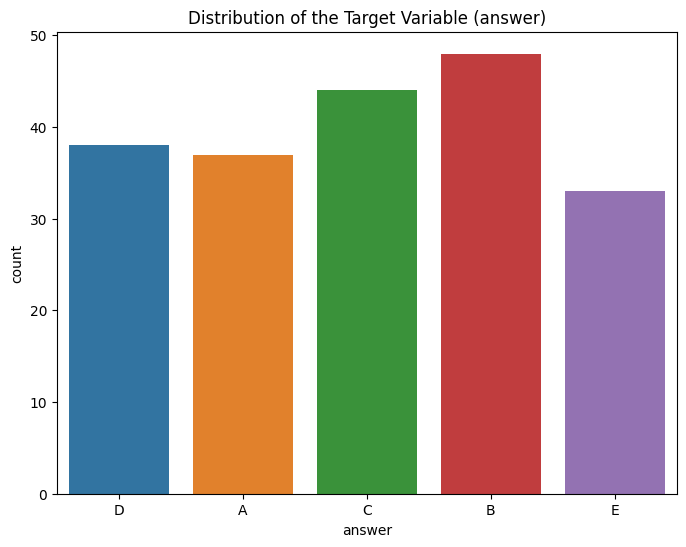

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='answer', data=train_data)
plt.title('Distribution of the Target Variable (answer)')
plt.show()

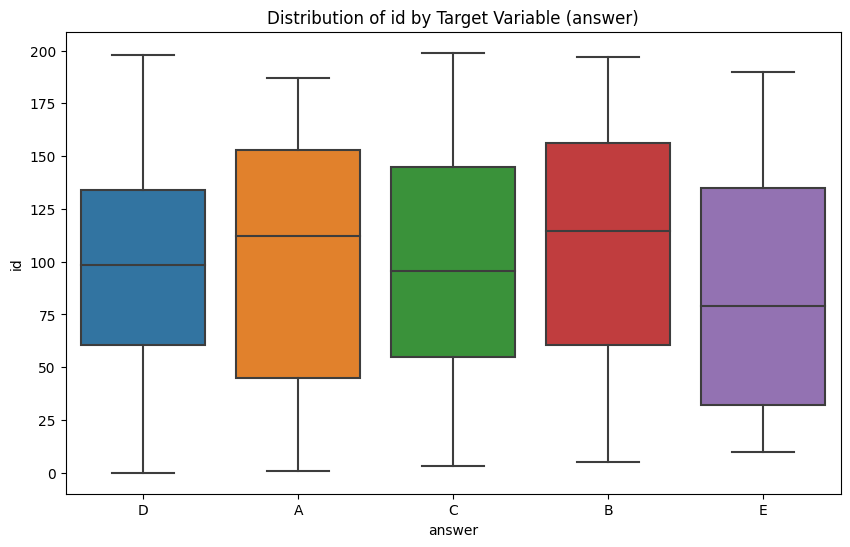

In [13]:
# Explore the distribution of numerical variables based on the target
numerical_vars = train_data.select_dtypes(include='number').columns
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='answer', y=var, data=train_data)
    plt.title(f'Distribution of {var} by Target Variable (answer)')
    plt.show()

In [15]:
# Identify potential predictive variables
predictive_vars = train_data.columns.tolist()
predictive_vars.remove('answer')

In [16]:
predictive_vars

['id', 'prompt', 'A', 'B', 'C', 'D', 'E']

# Advanced techniques and considerations for identifying potential predictive variables

## Text Data Exploration

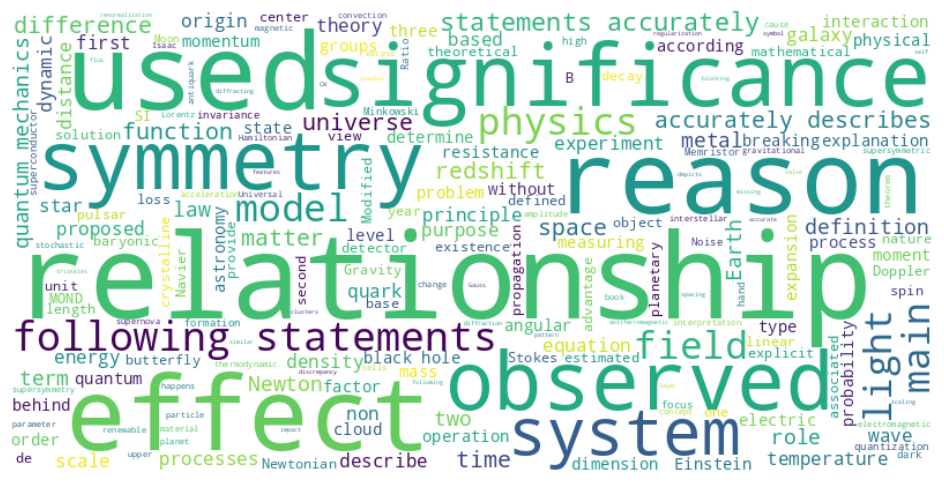

In [18]:
from wordcloud import WordCloud

# Generate a word cloud for the 'prompt' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['prompt']))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Categorical Variable Exploration

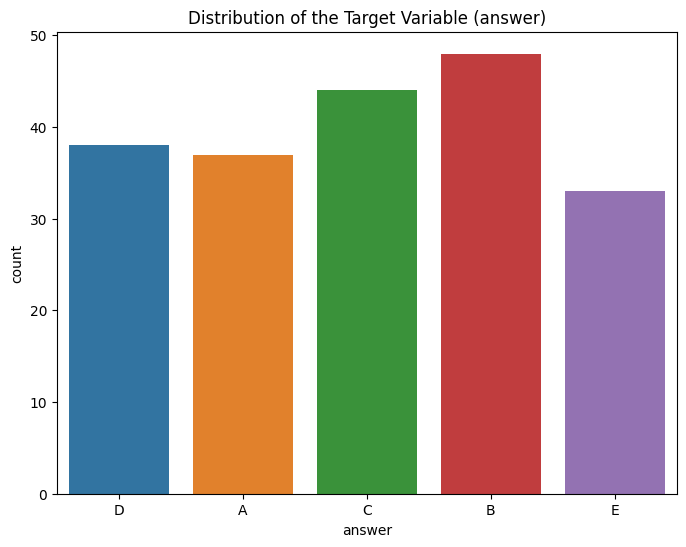

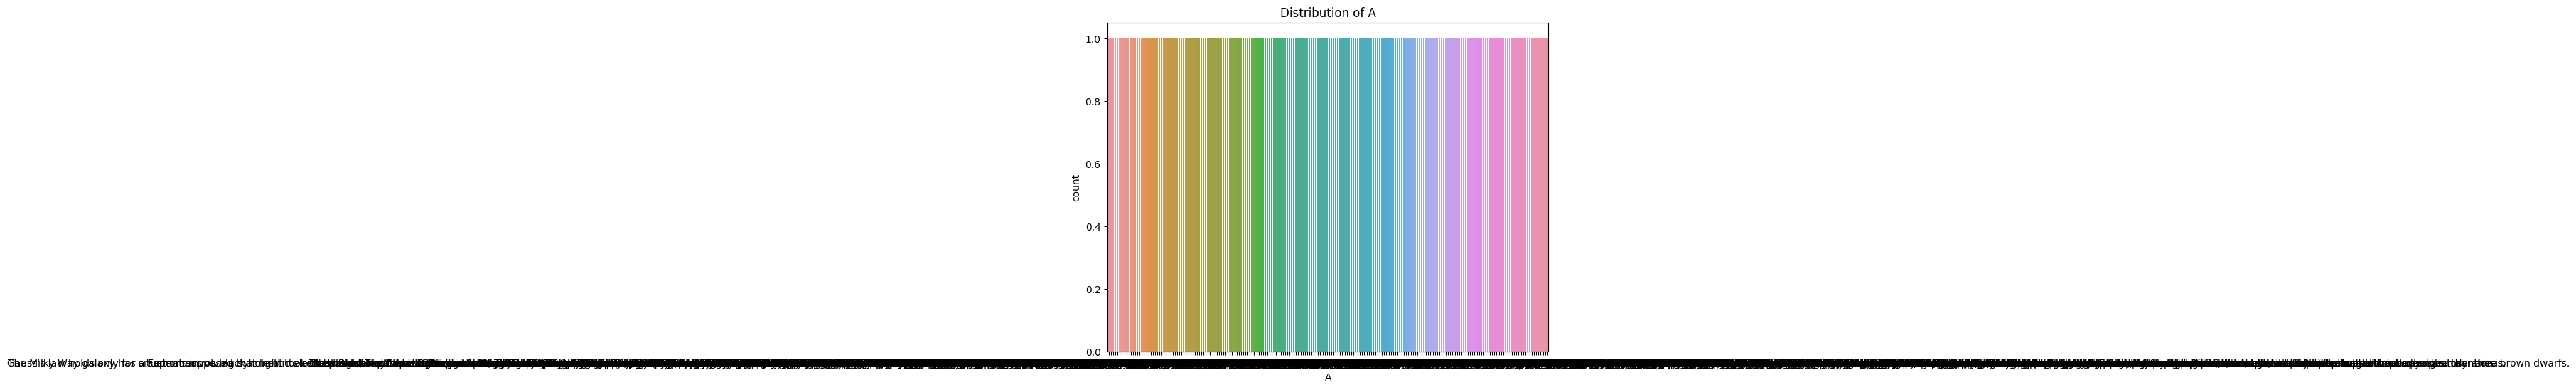

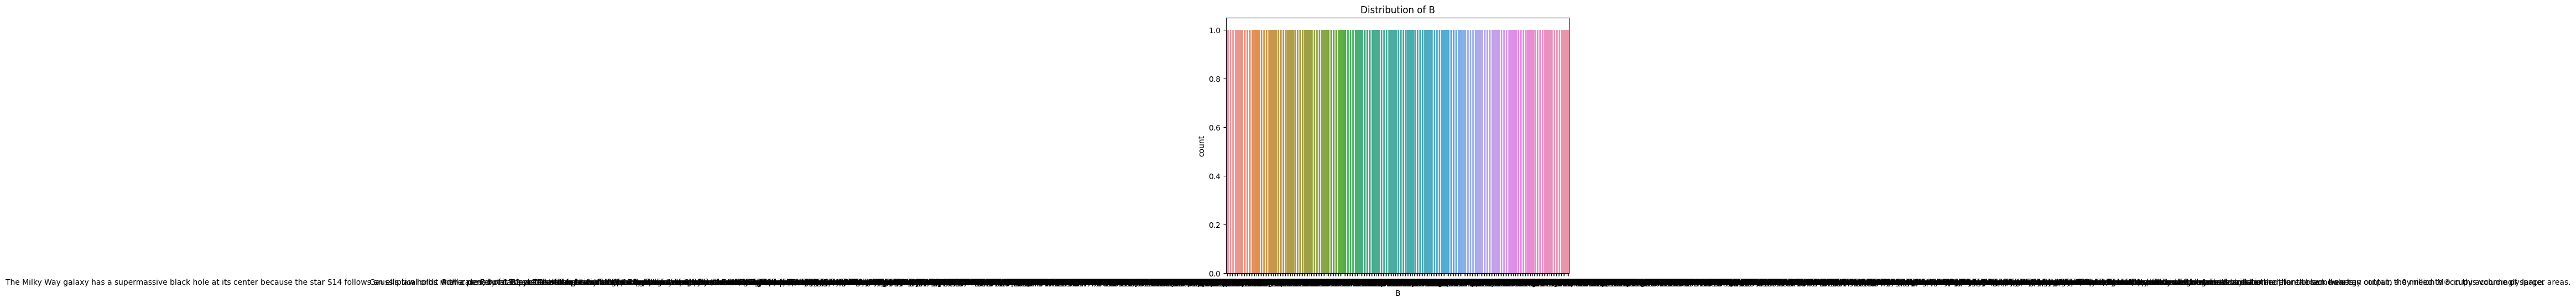

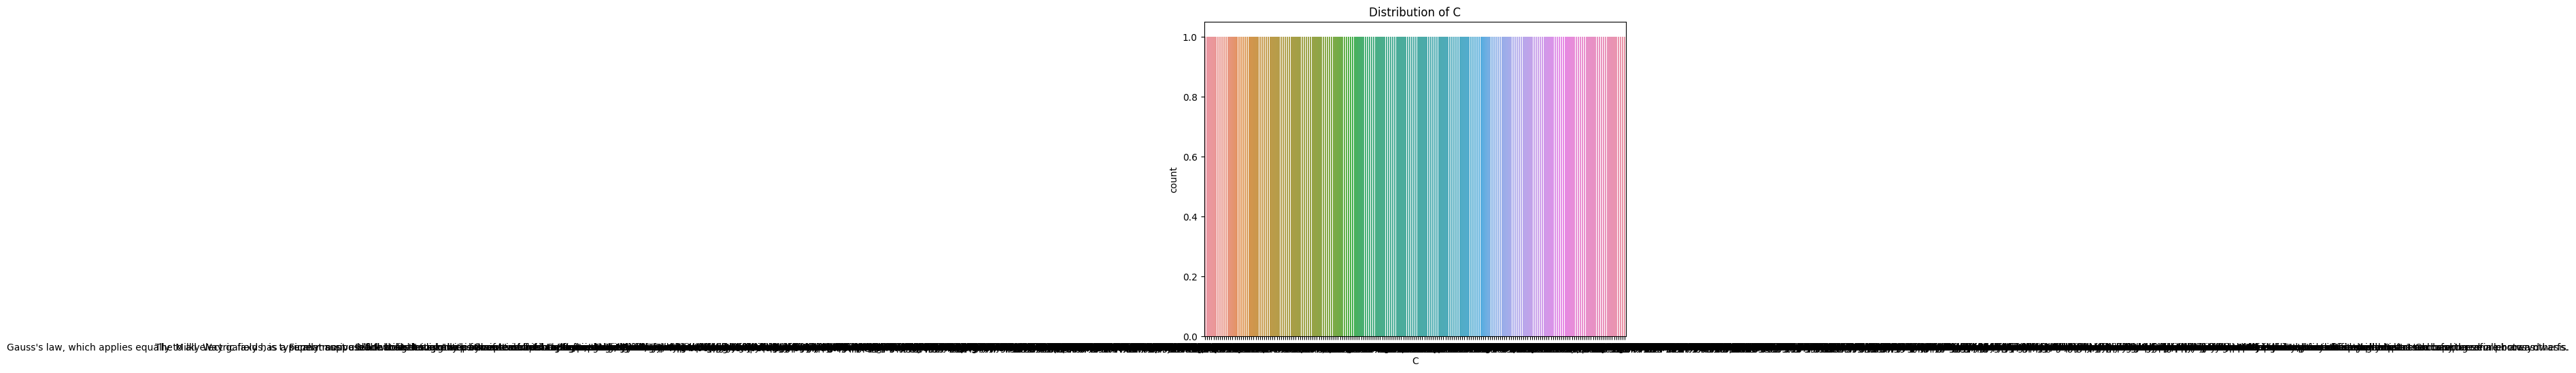

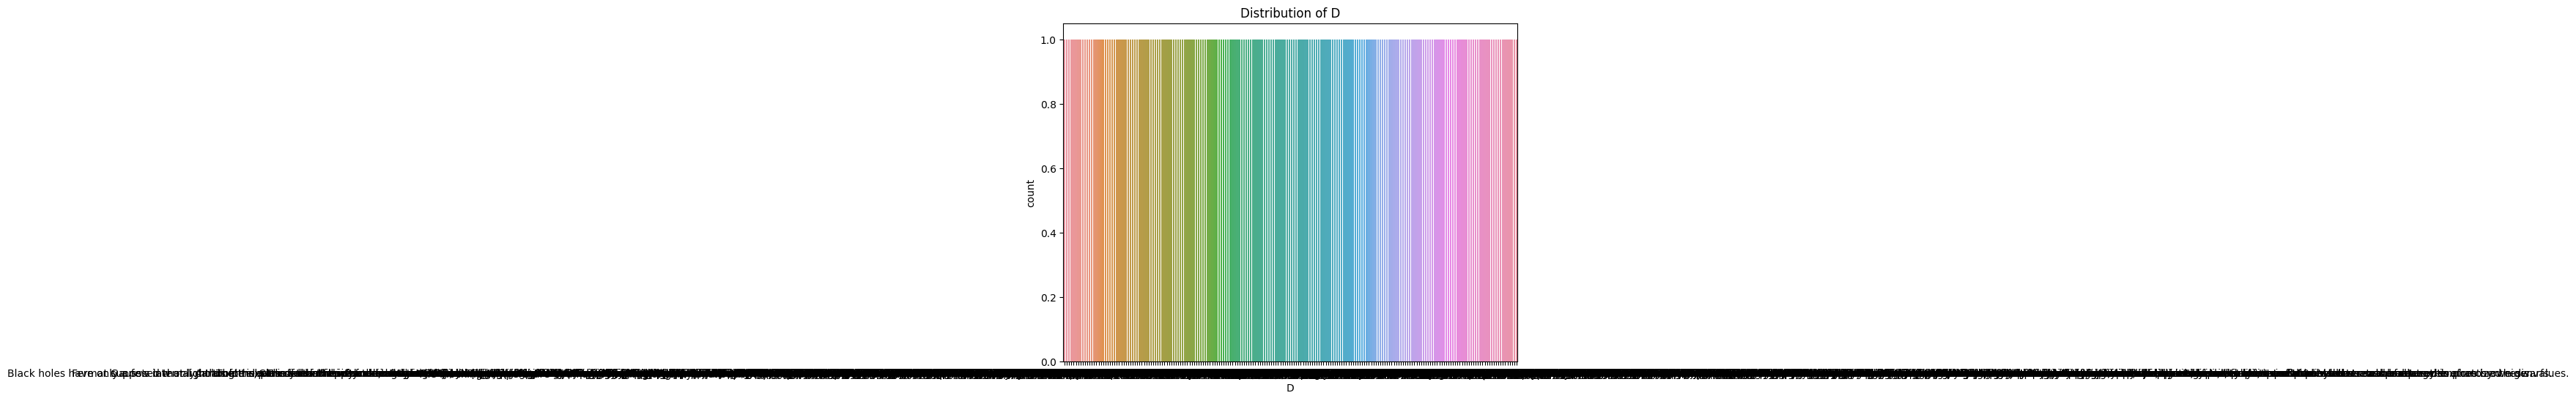

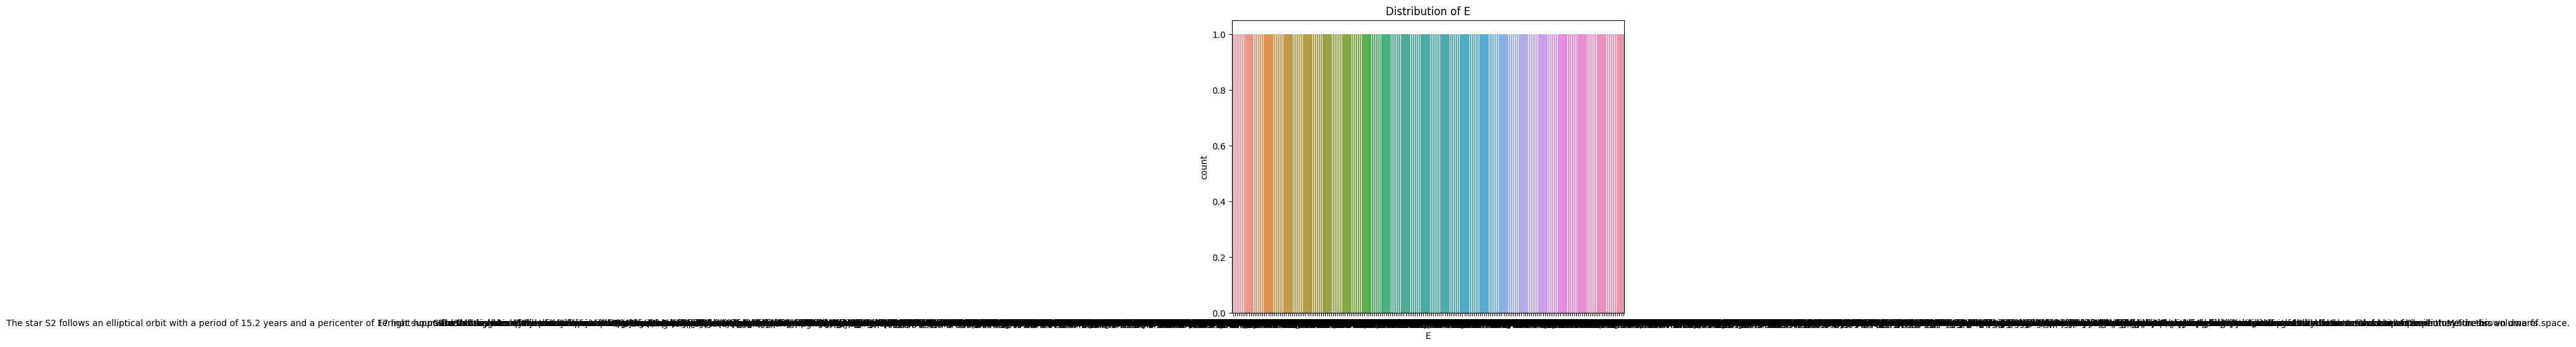

In [19]:
# Visualize the distribution of the 'answer' column
plt.figure(figsize=(8, 6))
sns.countplot(x='answer', data=train_data)
plt.title('Distribution of the Target Variable (answer)')
plt.show()

# Visualize the distribution of other categorical columns
for col in ['A', 'B', 'C', 'D', 'E']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=train_data)
    plt.title(f'Distribution of {col}')
    plt.show()

## Feature Engineering

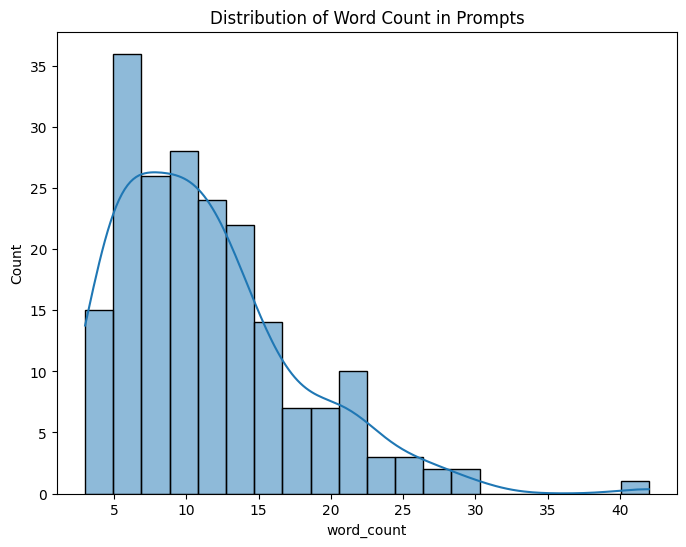

In [20]:
train_data['word_count'] = train_data['prompt'].apply(lambda x: len(str(x).split()))

# Visualize the distribution of the new feature
plt.figure(figsize=(8, 6))
sns.histplot(x='word_count', data=train_data, bins=20, kde=True)
plt.title('Distribution of Word Count in Prompts')
plt.show()

In [22]:
# Display summary and next steps
print("### Day 1 - Predictive Insights from EDA: Summary\n")
print("#### Identified Potential Predictive Variables\n")
print("1. **Numerical Variables:**")
print("   - Analyzed summary statistics for numerical variables, including mean, median, and quartiles.")
print("   - Explored the distribution of numerical features by visualizing box plots for each target class.")
print("\n2. **Categorical Variables:**")
print("   - Examined unique values in categorical variables 'A', 'B', 'C', 'D', and 'E' to understand the diversity of options.")
print("   - Visualized the distribution of the target variable ('answer') and other categorical features.")
print("\n3. **Text Data Exploration:**")
print("   - Conducted text data exploration on the 'prompt' column, generating a word cloud to highlight prominent terms and phrases.")

print("\n#### Insights and Observations\n")
print("- The dataset contains a mix of numerical, categorical, and text-based features.")
print("- The distribution of the target variable ('answer') provides an understanding of the class balance.")
print("- The word cloud offers insights into the diversity of terms within the 'prompt' column.")

print("\n#### Next Steps\n")
print("- Consider further feature engineering, such as extracting additional information from the 'prompt' column.")
print("- Explore potential interactions between variables.")
print("- Assess the impact of certain features on the target variable using advanced visualization techniques.")

print("\n#### Challenges and Considerations\n")
print("- Non-numeric nature of some columns requires alternative exploration methods.")

### Day 1 - Predictive Insights from EDA: Summary

#### Identified Potential Predictive Variables

1. **Numerical Variables:**
   - Analyzed summary statistics for numerical variables, including mean, median, and quartiles.
   - Explored the distribution of numerical features by visualizing box plots for each target class.

2. **Categorical Variables:**
   - Examined unique values in categorical variables 'A', 'B', 'C', 'D', and 'E' to understand the diversity of options.
   - Visualized the distribution of the target variable ('answer') and other categorical features.

3. **Text Data Exploration:**
   - Conducted text data exploration on the 'prompt' column, generating a word cloud to highlight prominent terms and phrases.

#### Insights and Observations

- The dataset contains a mix of numerical, categorical, and text-based features.
- The distribution of the target variable ('answer') provides an understanding of the class balance.
- The word cloud offers insights into the diversity

# -----------------------------------------------------------